# **Modelos de Regresion**

**MS Learn Challenge**

Problema: Una empresa que alquila bicicletas quiere predecir el número esperado de alquileres en un día determinado en el futuro.


### Información del dataset

Columnas:
- **instant**: Identificador único de fila
- **dteday**: La fecha en la que se observaron los datos - en este caso, los datos se recogieron diariamente; por lo que hay una fila por fecha.
- **season**: Un valor codificado numéricamente que indica la estación (1:invierno, 2:primavera, 3:verano, 4:otoño)
- **yr**: El año del estudio en el que se realizó la observación (el estudio tuvo lugar a lo largo de dos años: el año 0 representa 2011, y el año 1 representa 2012)
- **mnth**: El mes natural en el que se realizó la observación (1:enero ... 12:diciembre)
- **holiday**: Valor binario que indica si la observación se realizó o no en un día festivo)
- **weekday**: El día de la semana en que se realizó la observación (0:domingo ... 6:sábado)
- **workingday**: Valor binario que indica si el día es laborable (no de fin de semana ni festivo)
- **weathersit**: Un valor categórico que indica la situación meteorológica (1:despejado, 2:niebla/nubes, 3:lluvia ligera/nieve, 4:lluvia fuerte/granizo/nieve/niebla)
- **temp**: La temperatura en grados centígrados (normalizada)
- **atemp**: La temperatura aparente en grados centígrados (normalizada).
- **hum**: El nivel de humedad (normalizado)
- **windspeed**: La velocidad del viento (normalizada)
- **rentals**: El número de alquileres de bicicletas registrados.

En este conjunto de datos, **rentals** representa la **etiqueta** (el valor y) que nuestro modelo debe ser entrenado para predecir. Las otras columnas son características potenciales (valores X).

Como se mencionó anteriormente, puede realizar alguna ingeniería de características para combinar o derivar nuevas características. Por ejemplo, vamos a agregar una nueva columna denominada day al marco de datos extrayendo el componente day de la columna dteday existente. La nueva columna representa el día del mes del 1 al 31.

# 0 - Instalar y Preparar el Notebook
---

## Importar e instalar módulos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Importar y procesar dataset de entrenamiento

In [2]:
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv

bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())

--2023-02-11 21:40:33--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv.1’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.007s  

2023-02-11 21:40:33 (6.59 MB/s) - ‘daily-bike-share.csv.1’ saved [48800/48800]

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0       

In [3]:
# Separar características y etiquetas
# Después de separar el conjunto de datos, ahora tenemos matrices numpy llamadas **X** que contienen las features, y **y** que contienen las labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Dividir los datos 70%-30% en un dataset de entrenamiento y un dataset de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


# 1 - Entrenamiento del Modelo sin Preprocesamiento de Datos
---

GradientBoostingRegressor() 

MSE: 103604.97950549854
RMSE: 321.8772739810913
R2: 0.7968889403053827


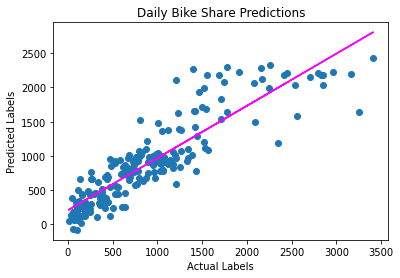

In [4]:
# Ajustar un modelo lasso al conjunto de entrenamiento
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluar el modelo utilizando los datos de prueba
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicción vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# Superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

##### Exportar modelo con joblib

In [5]:
# Guardar modelo como archivo ".pkl"
filename = './bike-share-v1.pkl'
joblib.dump(model, filename)

['./bike-share-v1.pkl']

### Optimización de hiperparámetros

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 103912.16771704148
RMSE: 322.3541029939614
R2: 0.7962867170969039


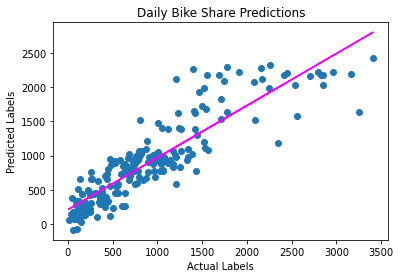

In [6]:
# Utilizar el algoritmo Gradient Boosting
alg = GradientBoostingRegressor()

params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Encontrar la mejor combinación de hiperparámetros para optimizar la métrica R2
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Obtener el mejor modelo
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluar el modelo con los datos de prueba
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicción vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# Superponer la línea de regresión
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

##### Exportar modelo con joblib

In [7]:
# Guardar modelo como archivo ".pkl"
filename = './bike-share-v2.pkl'
joblib.dump(model, filename)

['./bike-share-v2.pkl']

# 2 - Entrenamiento del Modelo con Preprocesamiento de Datos
---

### - Preprocesamiento de los datos usando Pipeline

In [8]:
# Definir preprocesamiento para columnas numéricas (escalarlas)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Definir el preprocesamiento de las características categóricas (codificarlas)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combinar los pasos del preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

### - Opción 01: Creamos un pipeline de procesamiento y entrenamiento usando GradientBoostingRegressor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])
MSE: 105307.42686857721
RMSE: 324.5110581607
R2: 0.7935513991018649


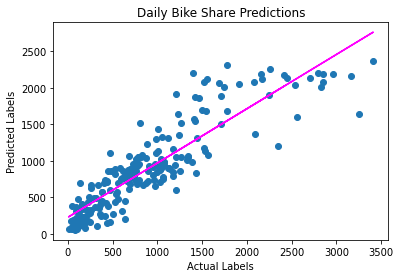

In [9]:
# Crear un pipeline de procesamiento y entrenamiento usando GradientBoostingRegressor
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# Ajustar el pipeline para entrenar el modelo de regresión lineal con el data set de entrenamiento
model = pipeline.fit(X_train, (y_train))
print(model)

# Obtener predicciones
predictions = model.predict(X_test)

# Visualizar métricas
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicción vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

##### Exportar modelo con joblib

In [10]:
# Guardar modelo como archivo ".pkl"
filename = './bike-share-v3.pkl'
joblib.dump(model, filename)

['./bike-share-v3.pkl']

### - Opción 02: Creamos un pipeline de procesamiento y entrenamiento usando RandomForestRegressor

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 104435.85688818182
RMSE: 323.16537080600364
R2: 0.7952600573455233


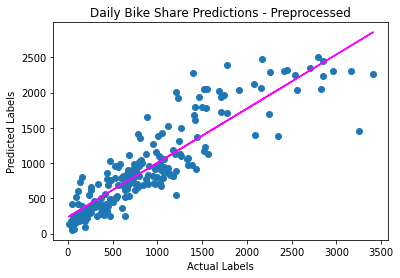

In [66]:
# Use a different estimator in the pipeline (RandomForestRegressor)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print(model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Gráfico predicción vs real
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

##### Exportar con joblib

In [36]:
# Guardar modelo como archivo ".pkl"
filename = './bike-share-v4.pkl'
joblib.dump(model, filename)

['./bike-share-v4.pkl']

# 3 - Exportar y Usar el Modelo
---

## Usar Modelo

In [37]:
# Cargamos el modelo desde el archivo .pkl
loaded_model = joblib.load('./bike-share-v4.pkl')

#### Ejemplo 01: Inferencia/Predicción de alquileres para 1 día:

In [40]:
# Creamos un array de numpy que contenga una nueva observación (por ejemplo, la información estacional y la previsión meteorológica de mañana)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Utilizamos el modelo para predecir los alquileres de mañana
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 113 rentals


#### Ejemplo 02: Inferencia/Predicción de alquileres para 5 días:

In [39]:
# Creamos un array de funciones basadas en la previsión meteorológica para cinco días
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Utilizamos el modelo para predecir los alquileres de cada día
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
631.0
828.0
263.0
216.0
300.0
